# Durable Consumption Model

This notebooks shows you how to use the tools of the **consav** package to solve a **durable consumption model** with either

1. **vfi**: standard value function iteration (**v_cpp** is written in C++)
* **nvfi**: nested value function iteration
* **negm**: nested endogenous grid point method

## Model equations

The full recursive formulation of model the is

$$ 
\begin{eqnarray*}
v_{t}(m_{t},\overline{d}_{t},p_{t}) & = & \max_{c_{t},d_{t}}\frac{(c_{t}^{\alpha}(d_{t}+\underline{d})^{1-\alpha})^{1-\rho}}{1-\rho}+\beta\mathbb{E}_{t}[v_{t+1}(\bullet)]\\
 & \text{s.t.}\\
a_{t} & = & m_{t}+\overline{d}_{t}-\tau\overline{d}_{t}\boldsymbol{1}_{d_{t}\neq\overline{d}_{t}}-c_{t}-d_{t}\\
m_{t+1} & = & Ra_{t}+y_{t+1}\\
\overline{d}_{t+1} & = & (1-\delta)d_{t}\\
p_{t+1} & = & \psi_{t+1}p_{t},\,\,\,\log\psi_{t+1}\sim\mathcal{N}(-0.5\sigma_{\psi}^{2},\sigma_{\psi}^{2})\\
y_{t+1} & = & p_{t+1}\\
\tilde{\xi}_{t+1} & = & \begin{cases}
\mu & \text{with prob. }\pi\\
\frac{\xi_{t+1}-\pi\mu}{1-\pi} & \text{else}
\end{cases}\xi_{t+1},\,\,\,\log\xi_{t+1}\sim\mathcal{N}(-0.5\sigma_{\xi}^{2},\sigma_{\xi}^{2})\\
a_{t} & \geq & 0.
\end{eqnarray*} 
$$

This can alternatively be written as:

$$ \begin{eqnarray*}
v_{t}(m_{t},\overline{d}_{t},p_{t}) & = & \max\{v_{t}^{keep}(m_{t},\overline{d}_{t},p_{t}\},v_{t}^{adj}(x_{t},p_{t})\}\\
 & \text{s.t.}\\
x_{t} & = & m_{t}+(1-\tau),
\end{eqnarray*} $$


where

$$ \begin{eqnarray*}
v_{t}^{keep}(m_{t},\overline{d}_{t},p_{t}) & = & \max_{c_{t}}\frac{(c_{t}^{\alpha}(d_{t}+\underline{d})^{1-\alpha})^{1-\rho}}{1-\rho}+w_{t}(a_{t},d_{t},p_{t})\\
 & \mbox{s.t.}\\
a_{t} & = & m_{t}-c_{t}\\
d_{t} & = & \overline{d}_{t}\\
a_{t} & \geq & 0,
\end{eqnarray*} $$

with

$$ w_{t}(a_{t},d_{t},p_{t})=\beta\mathbb{E}_{t}[v_{t+1}(m_{t+1},\overline{d}_{t},p_{t})] $$

and 

$$ \begin{eqnarray*}
v_{t}^{adj}(x_{t},p_{t}) & = & \max_{d_{t}}v_{t}^{keep}(m_{t},d_{t})\\
 & \mbox{s.t.}\\
m_{t} & = & x_{t}-d_{t}\\
m_{t} & \geq & 0
\end{eqnarray*} $$
The Euler-equation is

$$
c_{t}^{(\alpha-1)-\rho}((d_{t}+\underline{d})^{1-\alpha})^{1-\rho}= q_t(p_t,a_t) = \beta R\mathbb{E}_{t}[c_{t+1}^{(\alpha-1)-\rho}((d_{t+1}+\underline{d})^{1-\alpha})^{1-\rho}]
$$



## Overview

The model solved in this notebook is written in **DurableConsumptionModelModel.py**. 

It provides a class called **DurableConsumptionModelClass** inheriting its basic interface from the **ConsumptionSavingModelClass**. 

A short **overview** of the interface is:

1. Each instance of the BufferStockModel class must have a **name** and a **solmethod** 
* The **save()** method saves the model naming it **data/name_solmethod**
* Three lists must be defined in the initialization:
  1. **parlist**; parameters, grids, etc. (model.par)
  2. **sollist**; solution variables (model.sol)
  3. **simlist**; simulation variables (model.sim)
* The **setup()** method defines baseline parameters
* The **setup_grids()** constructs grids for states and shocks
* The **solve()** method solves the model (\_solve_prep() allocates memory)
* The **simulate()** method simulates the model (\_simulate_prep() allocates memory)

In addition to **DurableConsumptionModel.py**, this folder contains the following files:

1. **last_period.py**: calculate consumption and value funciton in last period
* **utility.py**: utility function and marginal utility function
* **trans.py**: state transition functions
* **post_decision.py**: calcualte $w$ and $q$
* **vfi.py**: solve with value function iteration
* **nvfi.py**: solve with nested value function iteration
* **negm.py**: solve with the nested endogenous grid method
* **simulate.py**: simulate for all solution methods
* **figs.py**: plot figures

The folder **cppfuncs** contains c++ functions used for solving with **vfi_cpp**.

## Numba

Before (important!) you load **Numba** you can disable it or choose the numbe of threads as follows:

In [1]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=72)
T = 5

# Setup

In [2]:
import time
import numpy as np

%matplotlib inline

# reload module each time cell is run
%load_ext autoreload
%autoreload 2

# load the BufferStockModel module
from DurableConsumptionModel import DurableConsumptionModelClass

# NEGM - nested endogenous grid method

In [3]:
model_negm = DurableConsumptionModelClass(name='example',solmethod='negm',do_print=1,T=T)
model_negm.numba_analysis() # solve with very coarse grids
model_negm.solve(compiler='intel')
model_negm.simulate()
model_negm.save()

numba-analysis done in 6.6 secs
 t = 4 solved in 1.0 secs
 t = 3 solved in 37.4 secs
 t = 2 solved in 37.5 secs
 t = 1 solved in 37.1 secs
 t = 0 solved in 36.9 secs
model simulated in 1.9 secs


**Plot** interactive decision functions:

In [4]:
model_negm.decision_functions()

interactive(children=(Dropdown(description='t', options=(0, 1, 2, 3, 4), value=0), Dropdown(description='ip', …

**Plot** life-cycle profiles:

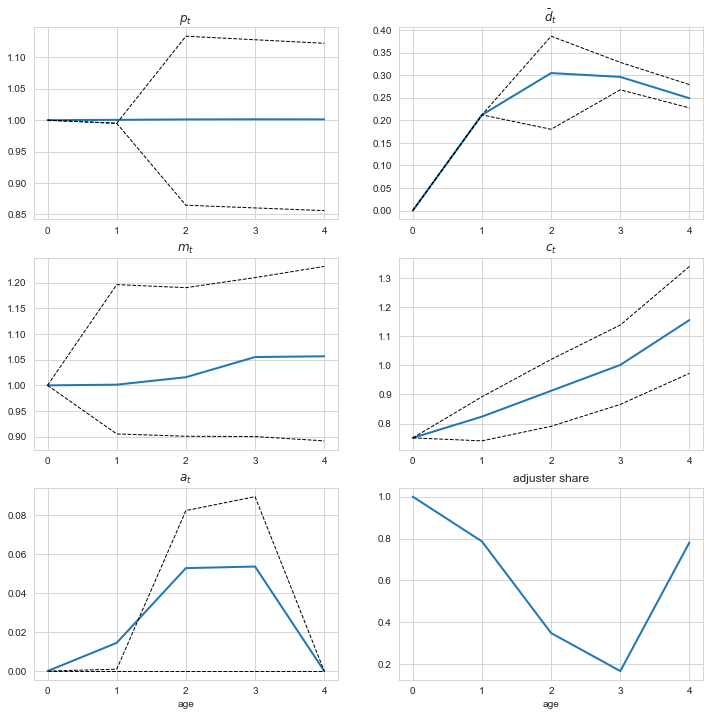

In [5]:
model_negm.lifecycle()

# NVFI - nested value function iteration

In [6]:
model_nvfi = DurableConsumptionModelClass(name='example',solmethod='nvfi',do_print=1,T=T)
model_nvfi.numba_analysis() # solve with very coarse grids
model_nvfi.solve(compiler='intel')
model_nvfi.simulate()
model_nvfi.save()

numba-analysis done in 6.4 secs
 t = 4 solved in 0.9 secs
  w computed in 9.0 secs
  solved keeper problem in 47.5 secs
  solved adjuster problem in 0.5 secs
 t = 3 solved in 57.2 secs
  w computed in 9.2 secs
  solved keeper problem in 47.8 secs
  solved adjuster problem in 0.6 secs
 t = 2 solved in 57.8 secs
  w computed in 9.1 secs
  solved keeper problem in 47.6 secs
  solved adjuster problem in 0.6 secs
 t = 1 solved in 57.5 secs
  w computed in 8.9 secs
  solved keeper problem in 48.1 secs
  solved adjuster problem in 0.6 secs
 t = 0 solved in 57.8 secs
model simulated in 1.9 secs


**Plot** interactive decision functions:

In [7]:
model_nvfi.decision_functions()

interactive(children=(Dropdown(description='t', options=(0, 1, 2, 3, 4), value=0), Dropdown(description='ip', …

**Plot** life-cycle profiles:

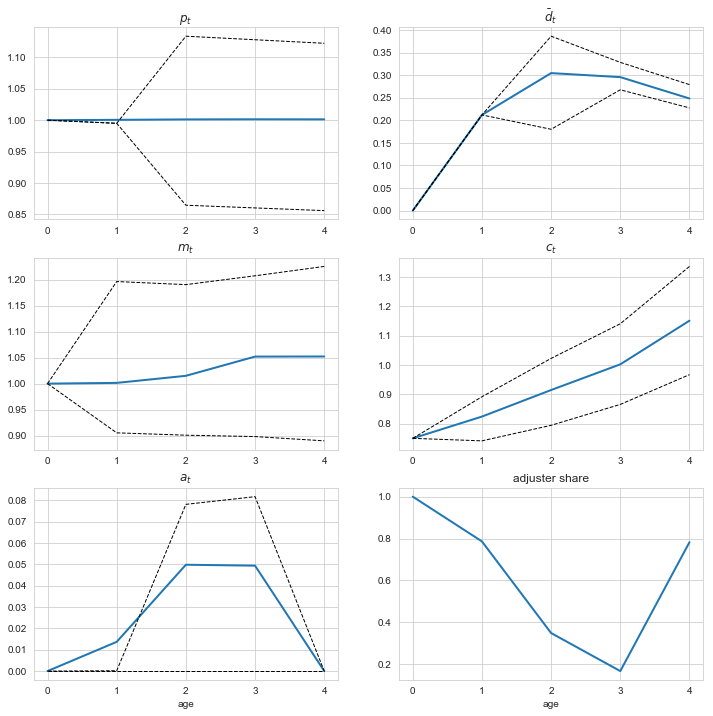

In [8]:
model_nvfi.lifecycle()

# Compare life-cycles

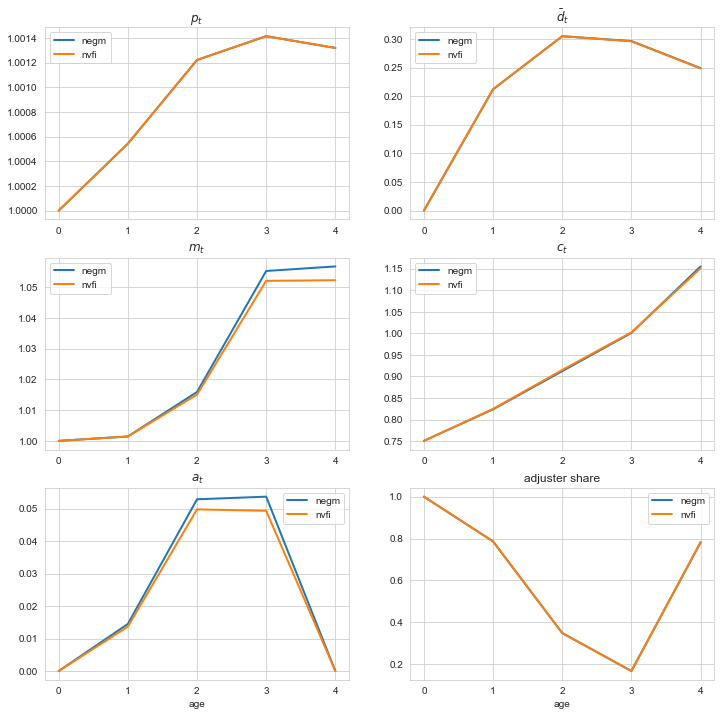

In [9]:
from figs import lifecycle_compare
lifecycle_compare(model_negm,'negm',model_nvfi,'nvfi')

# More

* The notebook **Compare VFI** compare the implementation of **vfi** and **vfi_cpp**
* The notebook **Comparisons** compare **negm**, **nvfi** and **vfi_cpp**